# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
it estimates the relationship between one independent variable and one dependent variable using a straight line

- What type of machine learning is linear regression?
supervised machine learning

- What is a “line of best fit” using the OLS method?
a straight line that minimizes the distance between it and some data

- What is the difference between correlation and regression?
Correlation quantifies the strength of the linear relationship between a pair of variables, whereas regression expresses the relationship in the form of an equation

- Describe a scenario when you would use linear regression and why you would use it. 
predicting the sales volume of a product based on different marketing strategies. it could help the company determine which marketing channels are most effective in driving sales

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
there is a linear relationship between the parameters of independent variables and the dependent variable

- Normality
residuals should follow a normal distribution

- Homoscedasticity
the error is constant along the values of the dependent variable

- No multicollinearity
assumes that the independent variables are not highly correlated with each other

- No endogeneity
there should be no relationship between the errors and the independent variables

- No autocorrelation
assumes that error terms are independent


### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
intercept of the regression line
- Coefficient of Independent Variable (B1)
slope of the regression equation
- Standard Error
standard deviation of any mean
- T-Statistic
the ratio of the departure of the estimated value of a parameter
- P-Value of T-Statistic (from the independent variable)
measures how likely it is that any observed difference between groups is due to chance

### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
the ratio of variation to the total variation
- Adjusted R-squared
solves the drawback of R2, shows the real improvement of the model

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline





In [2]:
# load data
df = pd.read_csv('house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  2014-10-13  221900.0         3       1.00         1180   
1      6414100192  2014-12-09  538000.0         3       2.25         2570   
2      5631500400  2015-02-25  180000.0         2       1.00          770   
3      2487200875  2014-12-09  604000.0         4       3.00         1960   
4      1954400510  2015-02-18  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
20451  2997800021  2015-02-19  475000.0         3       2.50         1310   
20452   263000018  2014-05-21  360000.0         3       2.50         1530   
20453  6600060120  2015-02-23  400000.0         4       2.50         2310   
20454   291310100  2015-01-16  400000.0         3       2.50         1600   
20455  1523300157  2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0        5650.0     1.0           0     1                3    7.0      1180.0   
1        7242.0     2.0           0     1                3    7.0      2170.0   
2       10000.0     1.0           0     1                3    6.0       770.0   
3        5000.0     1.0           0     1                5    7.0      1050.0   
4        8080.0     1.0           0     1                3    8.0      1680.0   
...         ...     ...         ...   ...              ...    ...         ...   
20451    1294.0     2.0           0     1                3    8.0      1180.0   
20452    1131.0     3.0           0     1                3    8.0      1530.0   
20453    5813.0     2.0           0     1                3    8.0      2310.0   
20454    2388.0     2.0           0     1                3    8.0      1600.0   
20455    1076.0     2.0           0     1                3    7.0      1020.0   

       sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0                  0      1955.0  98178.0  47.5112 -122.257            1340  
1                400      1951.0  98125.0  47.7210 -122.319            1690  
2                  0      1933.0  98028.0  47.7379 -122.233            2720  
3                910      1965.0  98136.0  47.5208 -122.393            1360  
4                  0      1987.0  98074.0  47.6168 -122.045            1800  
...              ...         ...      ...      ...      ...             ...  
20451            130      2008.0  98116.0  47.5773 -122.409            1330  
20452              0      2009.0  98103.0  47.6993 -122.346            1530  
20453              0      2014.0  98146.0  47.5107 -122.362            1830  
20454              0      2004.0  98027.0  47.5345 -122.069            1410  
20455              0      2008.0  98144.0  47.5941 -122.299            1020  

[20456 rows x 19 columns]

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

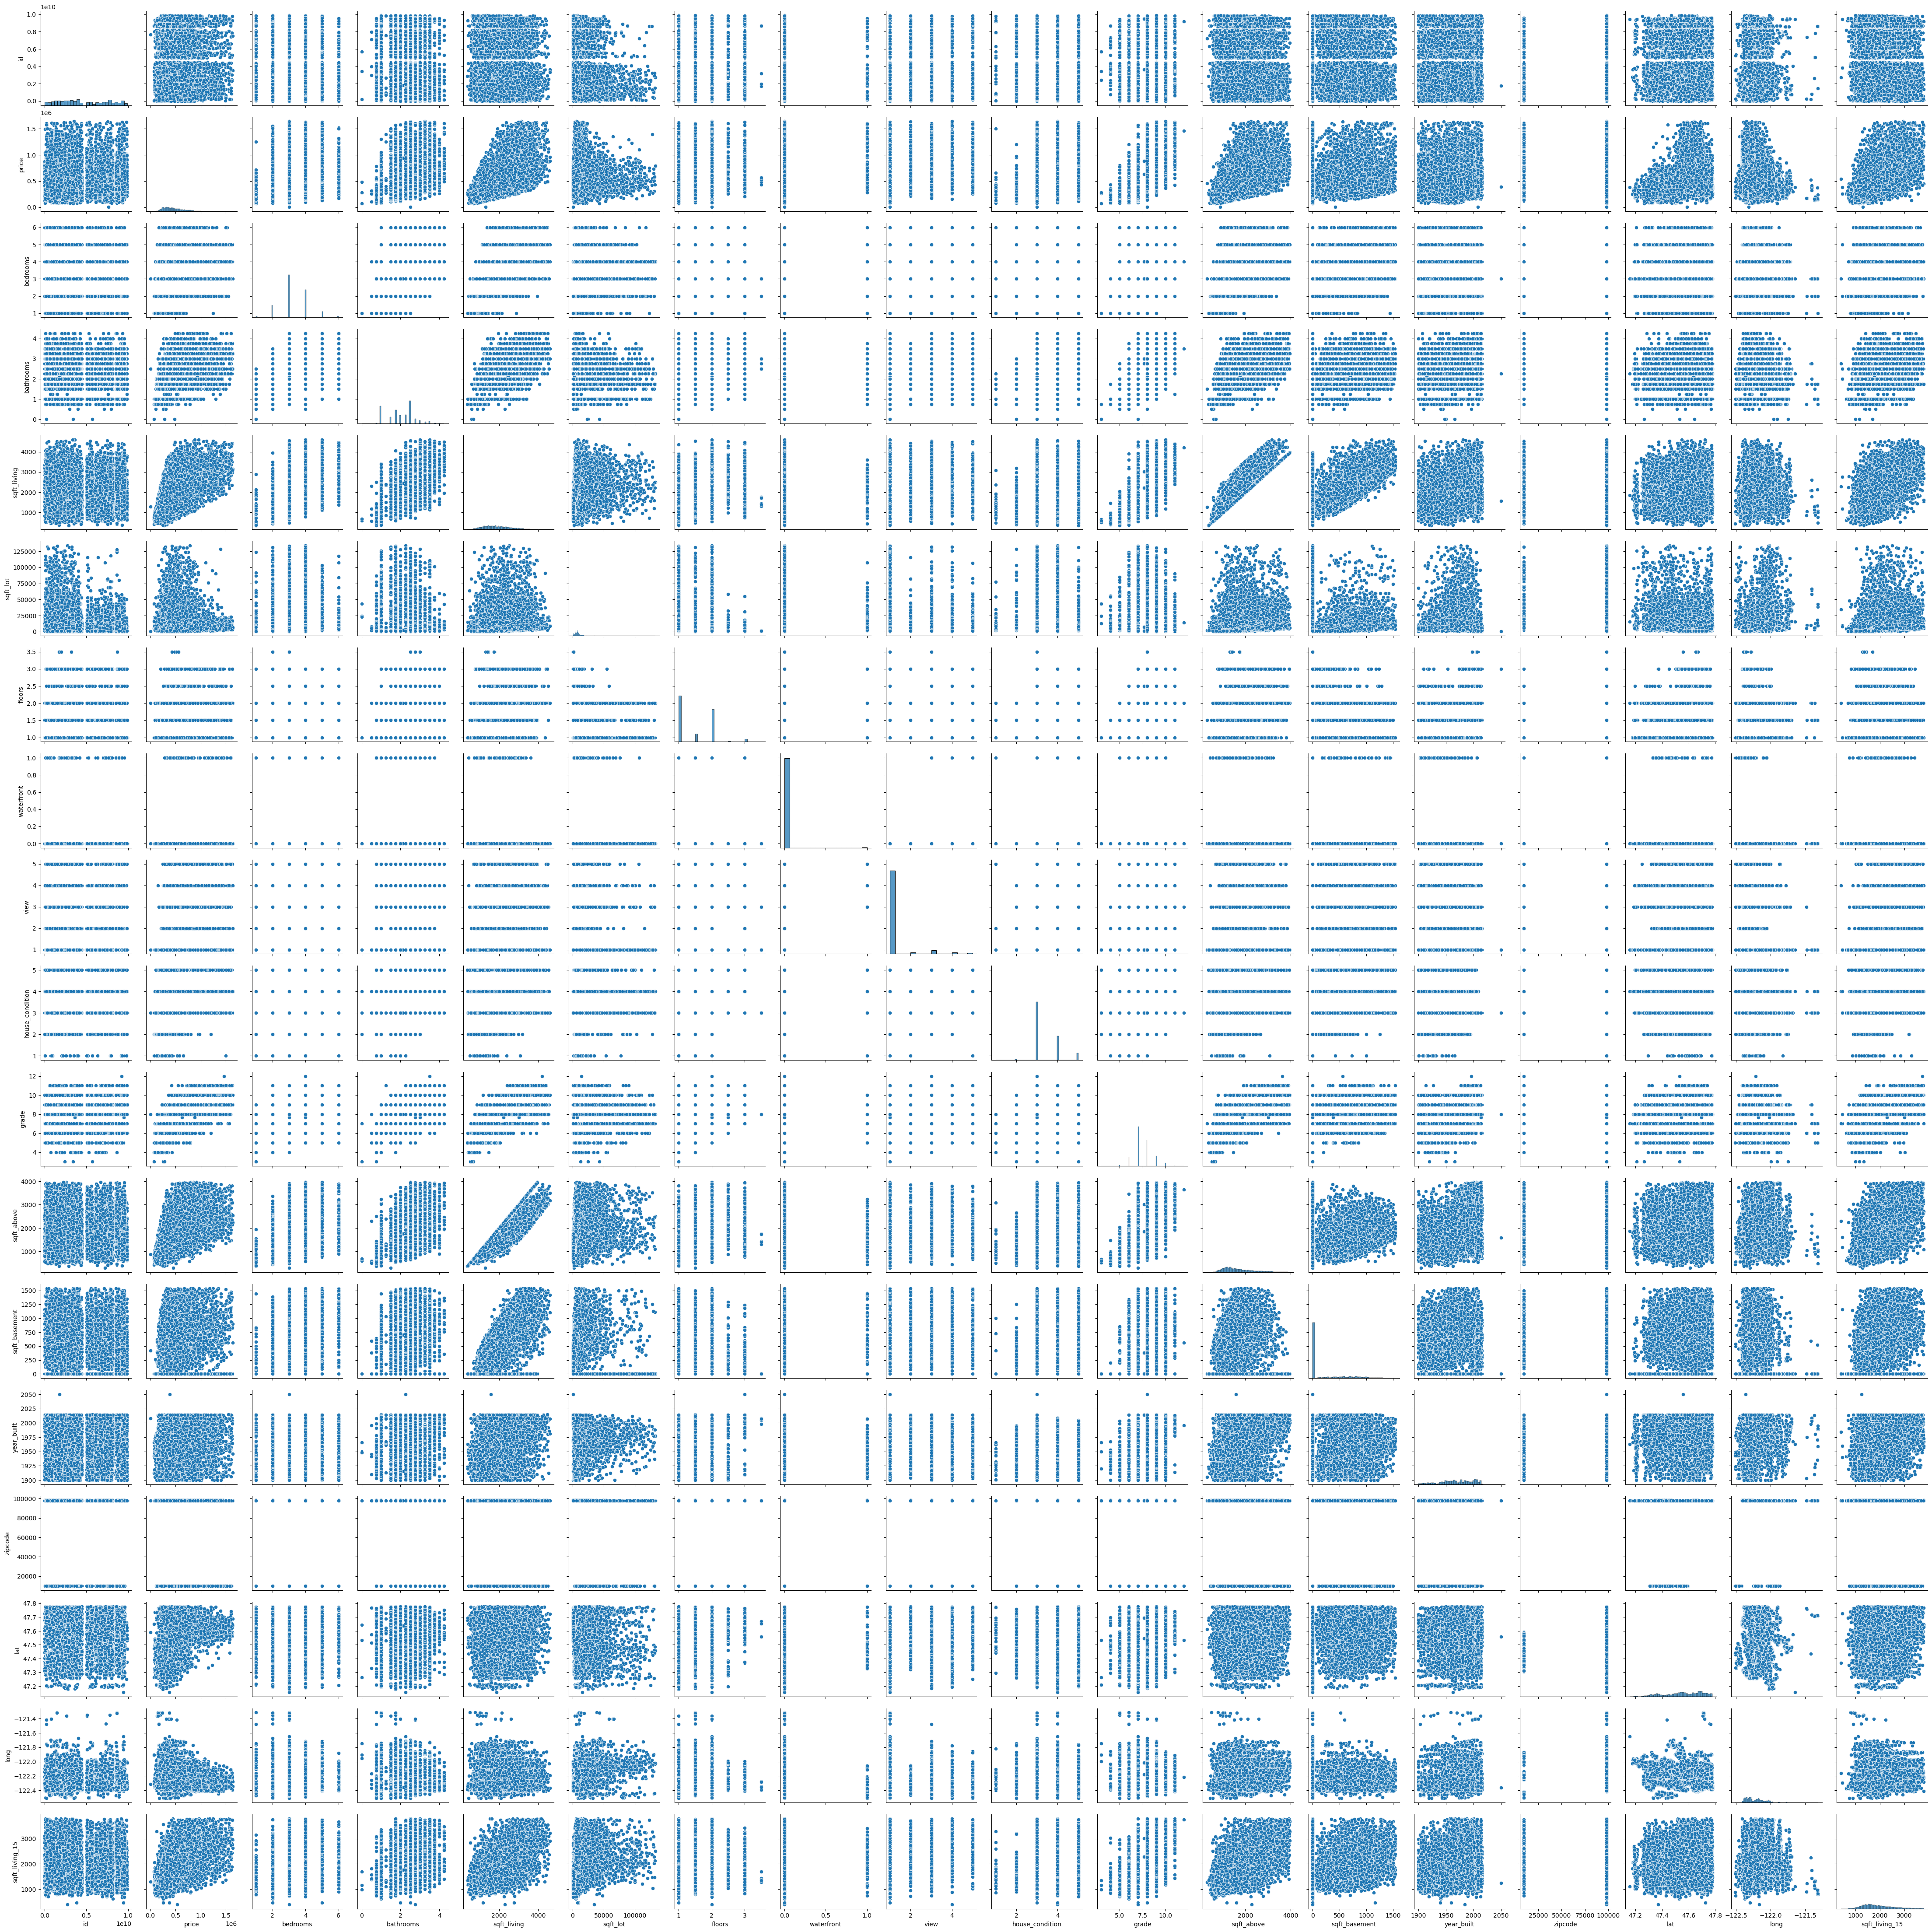

In [3]:
# explore data below (you will need to make new cells)
sns.pairplot(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [5]:
df = df[['price', 'sqft_living', 'sqft_lot', 'year_built', 'house_condition', 'grade', 'view']].copy()

In [6]:
df.describe()

price   sqft_living       sqft_lot    year_built  \
count  2.045600e+04  20456.000000   20456.000000  20456.000000   
mean   4.863355e+05   1942.120258   10302.509875   1969.985041   
std    2.398423e+05    724.345438   12700.282036     29.355600   
min    3.209000e+03    370.000000     520.000000   1900.000000   
25%    3.120000e+05   1390.000000    5000.000000   1950.750000   
50%    4.350000e+05   1840.000000    7412.000000   1972.000000   
75%    6.020000e+05   2410.000000   10022.250000   1995.000000   
max    1.640000e+06   4600.000000  133729.000000   2050.000000   

       house_condition         grade          view  
count     20456.000000  20456.000000  20456.000000  
mean          3.411322      7.514241      1.179165  
std           0.652286      1.026879      0.661116  
min           1.000000      3.000000      1.000000  
25%           3.000000      7.000000      1.000000  
50%           3.000000      7.000000      1.000000  
75%           4.000000      8.000000      1.000000  
max           5.000000     12.000000      5.000000

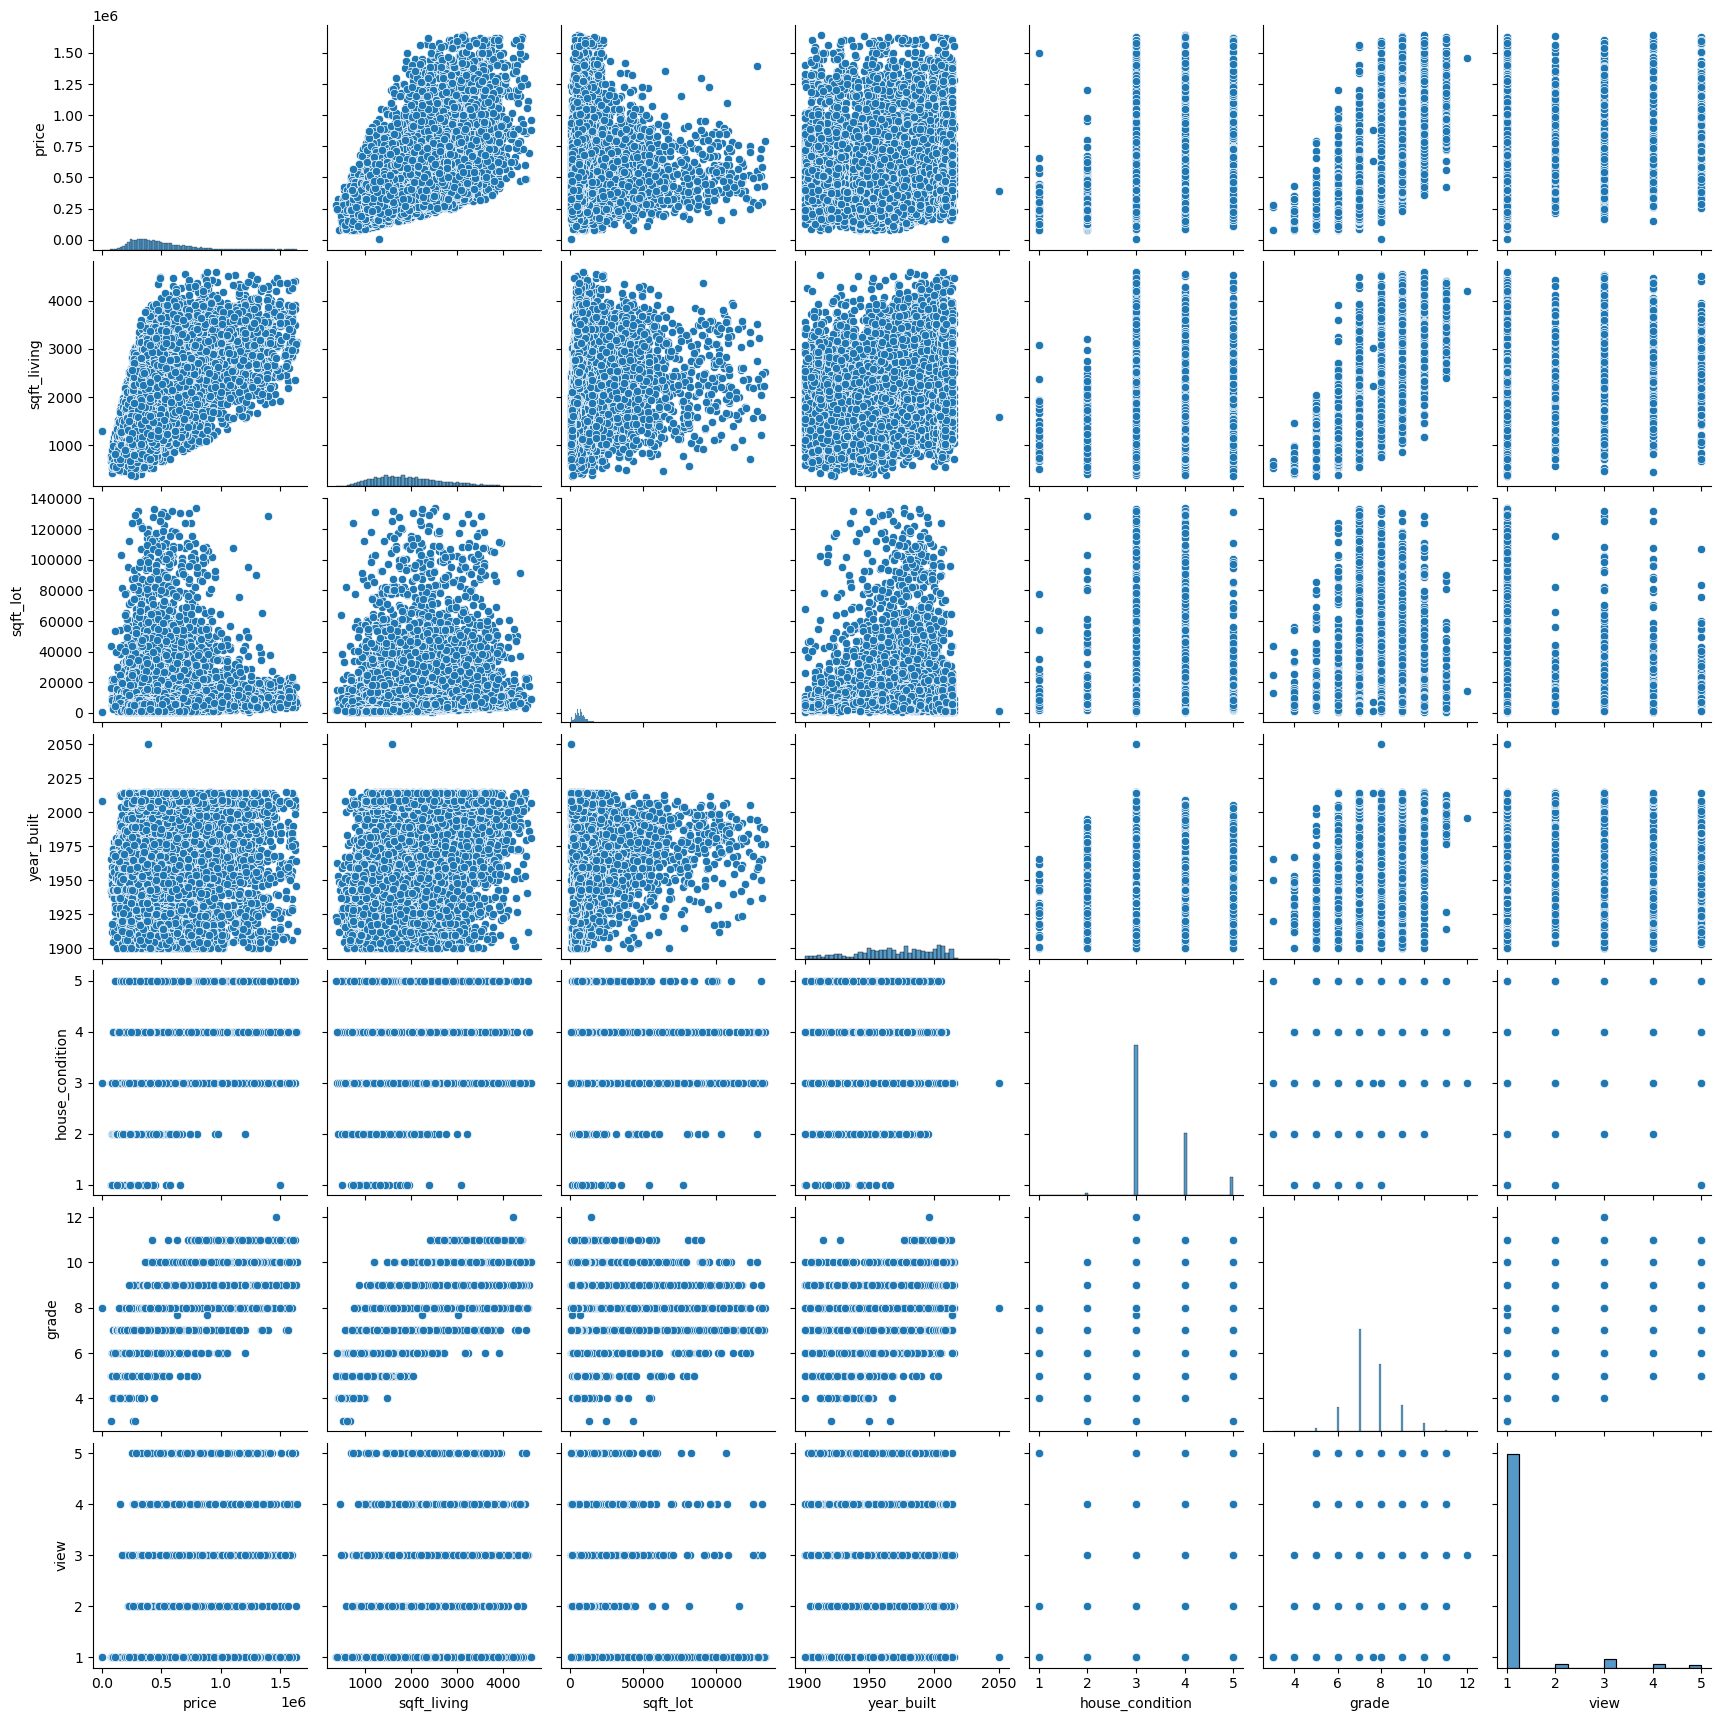

In [7]:
sns.pairplot(df)

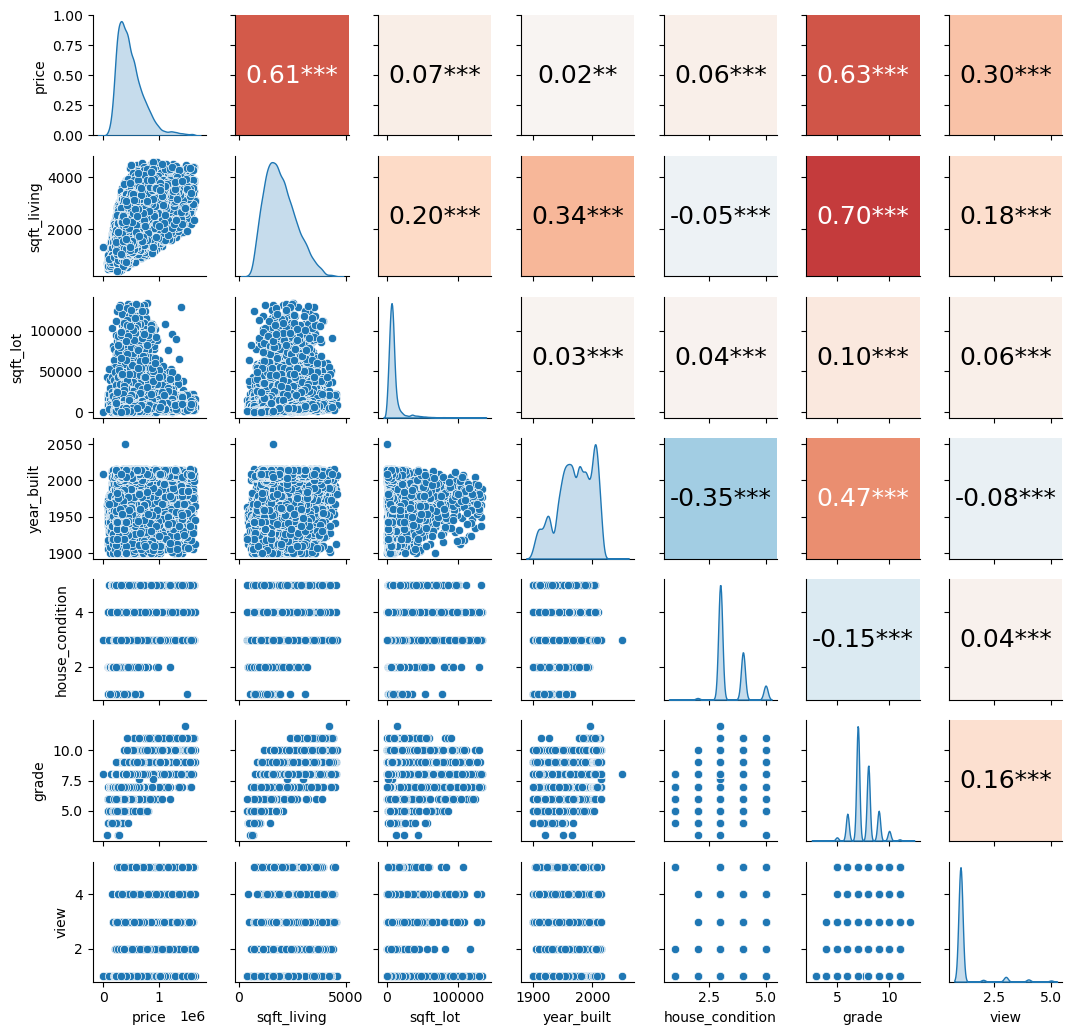

In [8]:
from scipy.stats import pearsonr


def corrfunc(x, y, **kwargs):
    def pvalue_stars(p):
        if 0.05 >= p > 0.01:
            return '*'
        elif 0.01 >= p > 0.001:
            return '**'
        elif p <= 0.001:
            return '***'
        else:
            return ''
    cmap = kwargs['cmap']
    norm = kwargs['norm']
    ax = plt.gca()
    ax.grid(False)
    r, p = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"{r:.2f}{pvalue_stars(p)}", xy=(.5, .5), xycoords=ax,
                color='white' if lightness < 0.7 else 'black',
                size=18, ha='center', va='center')



g = sns.PairGrid(df, height=1.5, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, shade=True)
g.map_upper(corrfunc,
            cmap=plt.get_cmap('RdBu_r'), 
            norm=plt.Normalize(vmin=-1, vmax=1))
g.add_legend()
plt.show()

strongest correlations with price:

-price and grade
-price and sqft
-price and view

### Step 3: Determine independent and dependent variable

In [9]:
# set X 
x1 = df['sqft_living']
# set Y 
y = df['price']

Text(0, 0.5, 'Price')

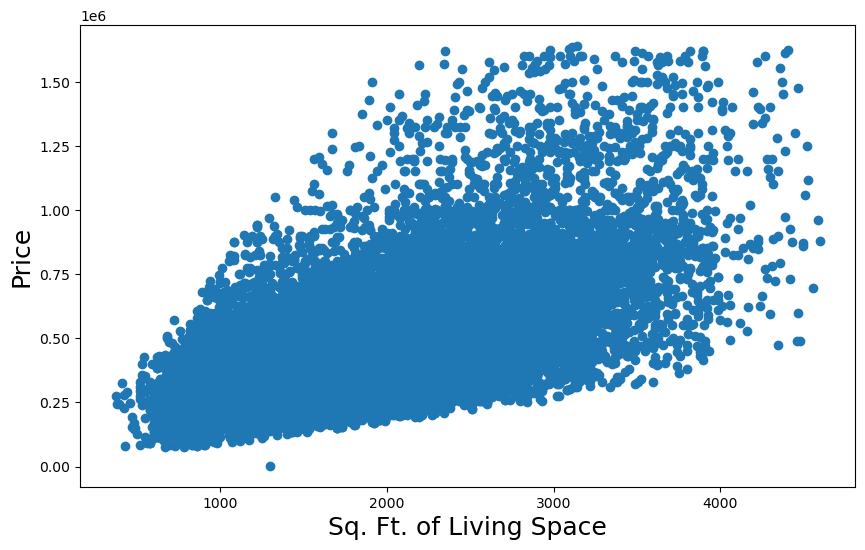

In [10]:
# visualize relationship between X and Y
plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.xlabel('Sq. Ft. of Living Space', fontsize=18)
plt.ylabel('Price', fontsize=18)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [11]:
# fit model to X and Y variables (you will need to make more cells)

In [12]:
x = sm.add_constant(x1)

In [13]:
results = sm.OLS(y,x).fit()

### Step 5: Interpret Model Summary 

In [14]:
# print out and interpret model summary // terms identified below
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:14:02   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the following from your model:

- R-squared 
.376, the price 
- Coefficient of independent variable
202.9775, start value
- P-value of T-statistic
0
- P-value of F-statistic
0

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [15]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100, 1500]})
new_df

constant  sqft_living
0         1         1100
1         1         1500

In [16]:
predictions = results.predict(new_df)
predictions

0    315404.008401
1    396595.022459
dtype: float64

In [17]:
new_df['price_predictions'] = results.predict(new_df)
new_df

constant  sqft_living  price_predictions
0         1         1100      315404.008401
1         1         1500      396595.022459

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [18]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

In [19]:
y = df['price']
x1 = df[['sqft_living', 'grade']]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [20]:
# fit new regression model (you will need to make more cells)

In [21]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:14:03   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 

- Adjusted R-squared
.452; 
- Coefficient of independent variables
113.22, 9.023e+04;
- P-value of T-statistic
0
- P-value of F-statistic
0


If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [27]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1200, 1200, 1200], 'grade':[6,6,8,8], 'view':[0,1,0,1]})
new_df

constant  sqft_living  grade  view
0         1         1200      6     0
1         1         1200      6     1
2         1         1200      8     0
3         1         1200      8     1

In [28]:
new_df['price_predictions'] = results.predict(new_df)
new_df

ValueError: shapes (4,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [ ]:
# create new markdown cell and write down your observations

the square footage of the living area only had an R-squared value of .376. adding grade the adjusted r-squared went to .452 adding view it went to .483

# Part 4 - Multivariate Time Series Analysis

In [ ]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 